## Feature Engineering

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *

Feature engineering tasks: 

* features for representing categorical data
* features for representing text
* features for representing images
* derived features for increasing model complexity
* imputation of missing data. 

Also known as vectorization

### Categorical Features

In [57]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

How to 'encode' the neighborhood feature?

In [4]:
# Naive
# Bad because sklearn assumes numbers like these have algebraic relationship
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

### One-hot encoding

In [22]:
# Dictionary Vectorizor

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

In [23]:
# Get Dummies
df = pd.DataFrame({
    'income': [100000,110000,90000,30000,14000,50000],
    'country':['US', 'CAN', 'US', 'CAN', 'MEX', 'US'],
    'race':['White', 'Black', 'Latino', 'White', 'White', 'Black']
})
pd.get_dummies(df)

,income,country_CAN,country_MEX,country_US,race_Black,race_Latino,race_White
0,100000,0,0,1,0,0,1
1,110000,1,0,0,1,0,0
2,90000,0,0,1,0,1,0
3,30000,1,0,0,0,0,1
4,14000,0,1,0,0,0,1
5,50000,0,0,1,1,0,0


In [24]:
# Sklearn OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])  

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [25]:
print(enc.n_values_)
enc.transform([[0, 1, 1]]).toarray()

[2 3 4]


array([[1., 0., 0., 1., 0., 0., 1., 0., 0.]])

### Text Features

In [26]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [29]:
# Count Vectorizer 
# Table of word counts
# Puts too much weight on frequent words
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [30]:
# TF-ID
# Term frequency-inverse document frequency 
# Weights words by frequency

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Image Features

In [31]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html

### Derived Features

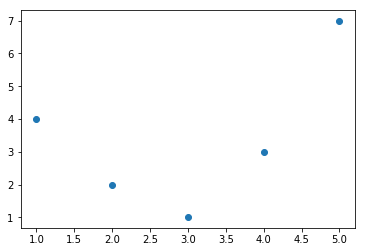

In [32]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

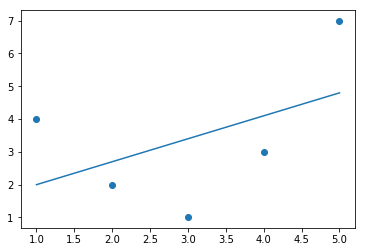

In [33]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [36]:
# Compute high-order features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


### Missing Data

Approaches

* Drop the observation
* Fill with sentinal value (9999)
* Fill with mean/median/mode of column
* Fill with previous/next value in time-series
* Matrix completion?

In [37]:
X = np.array([[ np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [53]:
# Inputer
from sklearn.preprocessing import Imputer

imp = Imputer(strategy='median')  #mean/most_frequent
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 8. , 6. ],
       [8. , 8. , 1. ]])

In [52]:
# Pandas
df = pd.DataFrame(X)
df[0].fillna(df[0].mean(), inplace=True)
df[1].fillna(df[1].mode(), inplace=True)
df

,0,1,2
0,4.5,0.0,3.0
1,3.0,7.0,9.0
2,3.0,5.0,2.0
3,4.0,8.0,6.0
4,8.0,8.0,1.0


### Sklearn Piplines

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

In [54]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [56]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
